## Ejemplo red clasificadora

Esta es una red clasificadora basica, que se entrena con un dataset (en este caso, de imagenes de 28x28 pixeles) para realizar predicciones sobre elementos similares al dataset. Este modelo evalua elementos segun alguna caracteristica entregada por el dataset. En este ejemplo usamos fashion_mnist, donde la caracteristica entregada es la prenda de ropa que corresponde a la imagen, asociado a un valor numerico (Ej: Pantalones -> 1). 

In [1]:
import tensorflow as tf  # Importamos tensorflow
import datetime
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.fashion_mnist #aca puedes poner cualquier dataset de imagenes que quieras
#clasificar, ejemplos son mnist y fashion_mnist


#Aca definimos el dataset que usaremos y normalizamos las imagenes.
(image_train, label_train), (image_test, label_test) = mnist.load_data()   # Imagenes de 28x28 pixeles
image_train = tf.keras.utils.normalize(image_train, axis=1) # label es la caracteristica o tipo de esa imagen 
image_test = tf.keras.utils.normalize(image_test, axis=1)

#Elegimos un modelo secuencial, que nos deja crear una estructura de red por capas
model = tf.keras.models.Sequential() 
#Convertimos las imagenes de matrices 28x28 a vectores 784
model.add(tf.keras.layers.Flatten())   
#Aca agregamos nuestras capas, dos capas ocultas y una de salida. La capa de entrada la definimos con input_shape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= image_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


#Usaremos Adam: Adaptive moment estimation como nuestro optimizador, sirve como default en muchas redes
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', #El loss es la funcion que la red busca minimizar 
              metrics=['accuracy'])  

In [2]:
# Entrenamos el modelo
history = model.fit(image_train, label_train, epochs=10,validation_data=(image_test, label_test))  

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.4889 - accuracy: 0.8213 - val_loss: 0.4150 - val_accuracy: 0.8430
Epoch 2/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3574 - accuracy: 0.8677 - val_loss: 0.3725 - val_accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 11s 175us/sample - loss: 0.3202 - accuracy: 0.8802 - val_loss: 0.3852 - val_accuracy: 0.8541
Epoch 4/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2952 - accuracy: 0.8896 - val_loss: 0.3363 - val_accuracy: 0.8772
Epoch 5/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2750 - accuracy: 0.8960 - val_loss: 0.3319 - val_accuracy: 0.8801
Epoch 6/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2604 - accuracy: 0.9027 - val_loss: 0.3316 - val_accuracy: 0.8809
Epoch 7/10
60000/60000 [====================

10000/10000 - 1s - loss: 0.3431 - accuracy: 0.8818


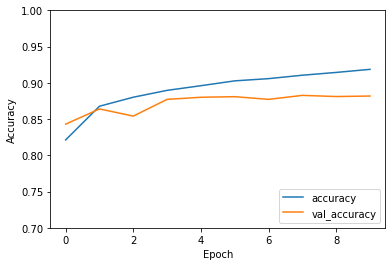

In [4]:
# Evaluamos nuestro modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_test,  label_test, verbose=2)

In [5]:
model.save('epic_num_reader.model') #para guardar el modelo

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [6]:
model = tf.keras.models.load_model('epic_num_reader.model') #Para volver a cargarlo


In [7]:
predictions = model.predict(image_test) #Creamos predicciones para un batch de testeo

In [8]:
# Las predicciones son vector de numeros entre 0 y 1, que representan la certeza de la red respecto a 
#la clasificacion de la imagen.
print(predictions) 

[[5.00473107e-06 1.92191720e-07 5.07835875e-06 ... 1.89331602e-02
  1.35560708e-06 9.76921499e-01]
 [5.31496655e-04 1.24727251e-11 9.96458948e-01 ... 2.35580826e-12
  1.02566155e-07 7.87206324e-12]
 [1.67686778e-06 9.99998212e-01 2.88105428e-09 ... 2.30652800e-18
  1.28912943e-08 7.44035181e-15]
 ...
 [1.11909112e-05 3.74155675e-08 5.17670014e-06 ... 7.91500698e-10
  9.99851346e-01 1.72326975e-12]
 [1.67259543e-07 9.99986291e-01 2.03115505e-07 ... 8.45027715e-14
  3.15597966e-08 3.93864759e-12]
 [1.04803871e-06 6.66490418e-09 3.95901708e-07 ... 5.24995312e-06
  1.68300448e-05 1.30734068e-09]]


In [9]:
n = 12
print(np.argmax(predictions[n]))
#Imprimimos la clasificacion de maxima certeza para el elemento n

5


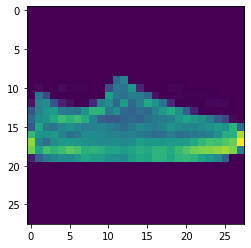

In [10]:
# Esta es la imagen asociada al elemento n
plt.imshow(image_test[n])
plt.show()

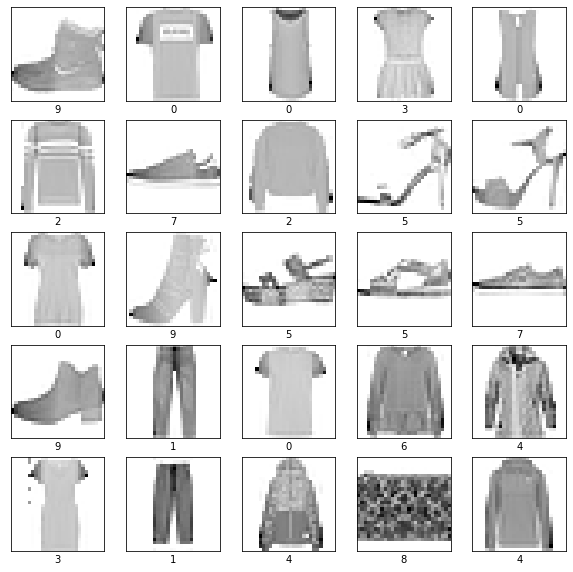

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_train[i])
plt.show()
#Aca se puede ver cual es la clasificacion de las imagenes, para verificar si la prediccion de la red fue correcta